In [104]:
#TP1 - KMeans

In [1]:
from scipy.io import arff
from enum import Enum
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import hdbscan



In [101]:
# Tools functions (Extraction, preparation, show)

def extract_data(name_file):
    data = arff.loadarff(open('artificial/{}'.format(name_file),'r'))
    xs = [feature[0] for feature in data[0]]
    ys = [feature[1] for feature in data[0]]
    return xs,ys

def prepare_dataset(xs,ys):
    tot_size = np.size(xs)
    X = []
    for i in range(tot_size):
        X.append([xs[i],ys[i]])
    return X

def filter_list(X,labels):
    new_X = []
    new_labels = []
    for i,label in enumerate(labels):
        if(label>=0):
            new_X.append(X[i])
            new_labels.append(labels[i])
                
    return new_X,new_labels

def showClusters(X,labels):
    xs,ys=matriceToColumnXY(X)
    plt.scatter(xs,ys,s=10,c=labels,cmap="rainbow")
    plt.show()
    
def matriceToColumnXY(X):
    xs = [feature[0] for feature in X]
    ys = [feature[1] for feature in X]
    return xs,ys 

def createTabOfInt(start,end,step):
    tab = []
    i = start 
    while(i<end):
        tab.append(i)
        i = i+step
    return tab

In [115]:
# Metrics
class MetricType(Enum):
    Silhouette=1
    DaviesBouldin=2
    
def scoreSilhouette(X,labels,best_score):
    score = metrics.silhouette_score(X, labels, metric='euclidean')
    return best_score < score, score

def scoreDaviesBouldin(X,labels,best_score):
    score = metrics.davies_bouldin_score(X, labels)
    return best_score > score, score

def scoreClustering(X,labels,metric_type:MetricType,best_score:float):
    switcher = {
        MetricType.silhouette: scoreSilhouette,
        MetricType.DaviesBouldin: scoreDaviesBouldin
    }
    # Get the function from switcher dictionary
    func = switcher.get(metric_type, lambda: "Invalid machine type")
    # Execute the function
    return func(X,labels,best_score)
    

In [116]:
# Clustering 
class ClusteringType(Enum):
    KMeans=1
    AgglomerativeClustering=2
    DBSCAN=3
    HDBSCAN=4
    
# CONSTANTS Clustering
MAX_NB_CLUSTERS = 31

In [123]:
# KMeans
def findBestParametersKMeans(X,tab_nb_clusters:int,metric_type:int):
    """
    Loop into tab_nb_clusters to find best nb_cluster
    """

    best_score = -float('inf')
    index_best = -1
    for i,nb_clusters in enumerate(tab_nb_clusters):
        print("{}%".format((i/np.size(tab_nb_clusters))*100))
        kmeans = KMeans(n_clusters=nb_clusters,init='k-means++').fit(X)
        better_match,score =  scoreClustering(X, kmeans.labels_, metric_type,best_score)
        if(better_match):
            best_match = score
            index_best = i
    return tab_nb_clusters[index_best]

def makeKMeans(X,metric_type:int):
    tab_nb_clusters = createTabOfInt(start=2,end=MAX_NB_CLUSTERS,step=1)
    best_nb_cluster = findBestParametersKMeans(X,tab_nb_clusters,metric_type)
    print("Best match is {} clusters".format(best_nb_cluster))
    kmeans = KMeans(n_clusters=best_nb_cluster,init='k-means++').fit(X)
    showClusters(X,kmeans.labels_)
    return kmeans.labels_

In [118]:
# AgglomerativeClustering        
def findBestParametersAgglomerativeClustering(X,tab_nb_clusters:np.array(int),tab_linkage:np.array(str)):
    """
    Loop into tab_nb_clusters to find best nb_cluster
    """

    best_score = -float('inf')
    index_best = -1
    for i,nb_clusters in enumerate(tab_nb_clusters):
        print("{}%".format((i/np.size(tab_nb_clusters))*100))
        clustering = AgglomerativeClustering(n_clusters=nb_clusters,linkage=linkage).fit(X)
        better_match,score =  scoreClustering(X, kmeans.labels_, metric_type,best_score)
        if(better_match):
            best_match = score
            index_best = i
    return tab_nb_clusters[index_best]

def makeAgglomerativeClustering(X,metric_type:int):
    linkage_list  = ["ward","complete","average","single"]
    for linkage in linkage_list:
        tab_nb_clusters = createTabOfInt(start=2,end=MAX_NB_CLUSTERS,step=1)
        best_nb_cluster = findBestParametersAgglomerativeClustering(X,tab_nb_clusters,metric_type)
        print("Best match is {} clusters and linkage {}".format(best_nb_cluster,linkage))
        clustering = AgglomerativeClustering(n_clusters=best_nb_cluster,linkage=linkage).fit(X)
        showClusters(X,clustering.labels_)
    return clustering.labels_

In [119]:
# DBSCAN
def findBestParametersDBSCAN(X,tab_eps:np.array(float),tab_min_nb_samples:np.array(int)):
    return 0
def makeDBSCAN(X,metric_type:int):
    return 0

In [120]:
# HDBSCAN
def findBestParametersHDBSCAN(X,tab_min_size_cluster:np.array(int)):
    return 0
def makeHDBSCAN(X,metric_type:int):
    return 0

In [121]:
# Choose clustering
def makeBestClustering(name_file:str,clustering_type:ClusteringType,metric_type:MetricType): 
    print(clustering_type.value)
    
    switcher = {
        ClusteringType.KMeans: makeKMeans,
        ClusteringType.AgglomerativeClustering: makeAgglomerativeClustering,
        ClusteringType.DBSCAN: makeDBSCAN,
        ClusteringType.HDBSCAN: makeHDBSCAN
    }
    # Get the function from switcher dictionary
    func = switcher.get(clustering_type, lambda: "Invalid machine type")
    
    start_time = time.time()
    # Extract data
    xs,ys = extract_data(name_file)
    # Prepare data
    X = prepare_dataset(xs,ys)
    
    
    # Execute the function
    labels = func(X,metric_type)
    
    print("--- %s seconds ---" % (time.time() - start_time))
    
    
    return labels

In [122]:
makeBestClustering("banana.arff",ClusteringType.KMeans,MetricType.DaviesBouldin)

1
0.0%


NameError: name 'best_score' is not defined

In [50]:
# TP2 - Clustering agglomératif


In [64]:
def find_best_cluster_number_silhouette_with_agglo(X,linkage:str,min_cluster:int,max_cluster:int):
    """
    Loop from min_cluster to max_cluster and keep best result with silhouette score
    """
    cluster_list =  [i for i in range(min_cluster,max_cluster+1)]
    
    best_match = -float('inf')
    index_best = -1
    for i,nb_clusters in enumerate(cluster_list):
            print(f'{(i/(np.size(cluster_list)))*100}%')

            clustering = AgglomerativeClustering(n_clusters=nb_clusters,linkage=linkage).fit(X)
            score_silhouette =  metrics.silhouette_score(X, clustering.labels_)
            if(best_match<score_silhouette):
                best_match = score_silhouette
                index_best = i
                best_linkage = linkage
    return cluster_list[index_best]

def find_best_cluster_and_linkage_number_silhouette_with_agglo(X,min_cluster:int,max_cluster:int):
    """
    Loop from min_cluster to max_cluster and keep best result with silhouette score
    """
    cluster_list =  [i for i in range(min_cluster,max_cluster+1)]
    linkage_list = ["ward","complete","average","single"]
    
    best_match = -float('inf')
    index_best = -1
    for i,nb_clusters in enumerate(cluster_list):
        for j,linkage in enumerate(linkage_list):
            clustering = AgglomerativeClustering(n_clusters=nb_clusters,linkage=linkage).fit(X)
            score_silhouette =  metrics.silhouette_score(X, clustering.labels_)
            if(best_match<score_silhouette):
                best_match = score_silhouette
                index_best = i
    return cluster_list[index_best],best_linkage

def make_agglo(name_file:str,linkage:str=None):

    MIN = 2
    MAX = 35
    print(f'make agglomerative clustering on {name_file}')
    start_time = time.time()
    
    xs,ys = extract_data(name_file)
    X = prepare_dataset(xs,ys)
    if(linkage==None):    
        best_nb_cluster,best_linkage = find_best_cluster_and_linkage_number_silhouette_with_agglo(X,MIN,MAX)
        labels = agglomerativeClustering_show(X,best_nb_cluster,linkage=best_linkage,display=True)
        print(f'Best clustering with linkage = {best_linkage} and nb_clusters = {best_nb_cluster}')
    else:
        best_nb_cluster = find_best_cluster_number_silhouette_with_agglo(X,linkage,MIN,MAX)
        labels = agglomerativeClustering_show(X,best_nb_cluster,linkage=linkage,display=True)
        print(f'Best clustering with linkage = {linkage} and nb_clusters = {best_nb_cluster}')
        
    print("--- %s seconds ---" % (time.time() - start_time))


make agglomerative clustering on dartboard1.arff
0.0%
2.941176470588235%
5.88235294117647%
8.823529411764707%
11.76470588235294%
14.705882352941178%
17.647058823529413%
20.588235294117645%
23.52941176470588%
26.47058823529412%
29.411764705882355%
32.35294117647059%
35.294117647058826%
38.23529411764706%
41.17647058823529%
44.11764705882353%
47.05882352941176%
50.0%
52.94117647058824%
55.88235294117647%
58.82352941176471%
61.76470588235294%
64.70588235294117%
67.64705882352942%
70.58823529411765%
73.52941176470588%
76.47058823529412%
79.41176470588235%
82.35294117647058%
85.29411764705883%
88.23529411764706%
91.17647058823529%
94.11764705882352%
97.05882352941177%


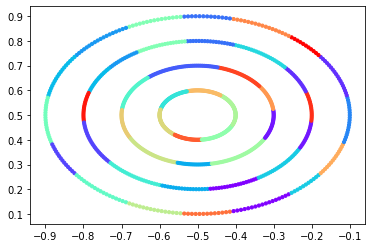

Best clustering with linkage = ward and nb_clusters = 35
--- 1.21464204788208 seconds ---
make agglomerative clustering on dartboard1.arff
0.0%
2.941176470588235%
5.88235294117647%
8.823529411764707%
11.76470588235294%
14.705882352941178%
17.647058823529413%
20.588235294117645%
23.52941176470588%
26.47058823529412%
29.411764705882355%
32.35294117647059%
35.294117647058826%
38.23529411764706%
41.17647058823529%
44.11764705882353%
47.05882352941176%
50.0%
52.94117647058824%
55.88235294117647%
58.82352941176471%
61.76470588235294%
64.70588235294117%
67.64705882352942%
70.58823529411765%
73.52941176470588%
76.47058823529412%
79.41176470588235%
82.35294117647058%
85.29411764705883%
88.23529411764706%
91.17647058823529%
94.11764705882352%
97.05882352941177%


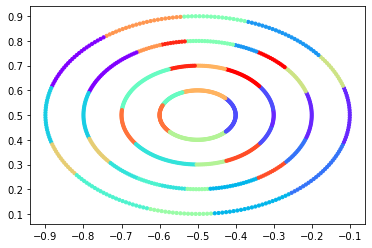

Best clustering with linkage = complete and nb_clusters = 21
--- 1.0790772438049316 seconds ---
make agglomerative clustering on dartboard1.arff
0.0%
2.941176470588235%
5.88235294117647%
8.823529411764707%
11.76470588235294%
14.705882352941178%
17.647058823529413%
20.588235294117645%
23.52941176470588%
26.47058823529412%
29.411764705882355%
32.35294117647059%
35.294117647058826%
38.23529411764706%
41.17647058823529%
44.11764705882353%
47.05882352941176%
50.0%
52.94117647058824%
55.88235294117647%
58.82352941176471%
61.76470588235294%
64.70588235294117%
67.64705882352942%
70.58823529411765%
73.52941176470588%
76.47058823529412%
79.41176470588235%
82.35294117647058%
85.29411764705883%
88.23529411764706%
91.17647058823529%
94.11764705882352%
97.05882352941177%


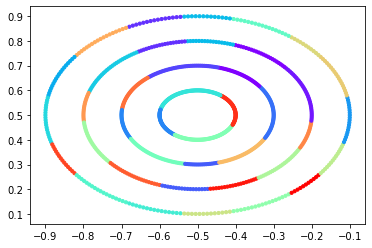

Best clustering with linkage = average and nb_clusters = 35
--- 1.0809462070465088 seconds ---
make agglomerative clustering on dartboard1.arff
0.0%
2.941176470588235%
5.88235294117647%
8.823529411764707%
11.76470588235294%
14.705882352941178%
17.647058823529413%
20.588235294117645%
23.52941176470588%
26.47058823529412%
29.411764705882355%
32.35294117647059%
35.294117647058826%
38.23529411764706%
41.17647058823529%
44.11764705882353%
47.05882352941176%
50.0%
52.94117647058824%
55.88235294117647%
58.82352941176471%
61.76470588235294%
64.70588235294117%
67.64705882352942%
70.58823529411765%
73.52941176470588%
76.47058823529412%
79.41176470588235%
82.35294117647058%
85.29411764705883%
88.23529411764706%
91.17647058823529%
94.11764705882352%
97.05882352941177%


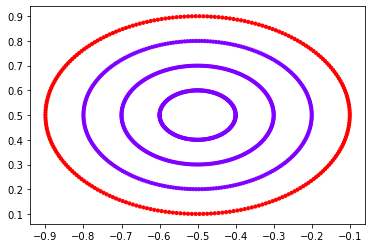

Best clustering with linkage = single and nb_clusters = 2
--- 0.8304872512817383 seconds ---


In [67]:
# Testing on various dataset
'''
name_file = "banana.arff" # best > single
make_agglo(name_file)
 
name_file = "2d-3c-no123.arff"
make_agglo(name_file)  
    
name_file = "D31.arff"
make_agglo(name_file)  


l
for linkage in linkage_list:
    make_agglo(name_file,linkage) 
'''
linkage_list  = ["ward","complete","average","single"]
for linkage in linkage_list:
    make_agglo("dartboard1.arff",linkage) 
 

In [4]:
# DB SCAN 
from scipy.io import arff
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import time


In [5]:
def matriceToColumnXY(X):
    xs = [feature[0] for feature in X]
    ys = [feature[1] for feature in X]
    return xs,ys 

def extract_data(name_file):
    data = arff.loadarff(open('artificial/{}'.format(name_file),'r'))
    return matriceToColumnXY(data[0])

def prepare_dataset(xs,ys):
    tot_size = np.size(xs)
    X = []
    for i in range(tot_size):
        X.append([xs[i],ys[i]])
    return X


def dbscan_show(X,min_samples:int,eps:float,display:bool=False):
    clustering = DBSCAN(min_samples=min_samples,eps=eps).fit(X)
    # Visualize clusters
    if(display):
        showClusters(X,clustering.labels_)
    return clustering.labels_

def make_random_DBSCAN(name_file,min_samples,eps):
    start_time = time.time()
    
    xs,ys = extract_data(name_file)
    X = prepare_dataset(xs,ys)
    
    labels = dbscan_show(X,min_samples,eps,display=True)
    
    print(labels)
    print("--- %s seconds ---" % (time.time() - start_time)) 

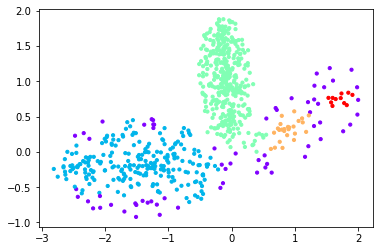

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0
  0 -1  0  0 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  0  0 -1 -1  0  0
  0  0  0  0  0  0  0 -1  0 -1  0  0  0 -1  0  0 -1  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  0 -1  0  0  0  0 -1 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [6]:
# Random test
make_random_DBSCAN("2d-3c-no123.arff",10,0.2)

In [53]:


def find_parameters_dbscan(X,tab_eps:np.array(float),tab_nb_samples:np.array(int)):
    """
    Loop into tab_eps and tab_nb_samples to find best values using silhouette to find
    """
    best_score = -float('inf')
    index_best_eps = -1
    index_best_nb_samples = -1
    
    for i,eps in enumerate(tab_eps):
            print(f'{(i/(np.size(tab_eps)))*100}%')
            for j,nb_samples in enumerate(tab_nb_samples):
                clustering = DBSCAN(min_samples=nb_samples,eps=eps).fit(X)
                if(len(set(clustering.labels_))>2):
                    #new_X,new_labels = filter_list(X,clustering.labels_)
                    score_silhouette =  metrics.silhouette_score(X,clustering.labels_)
                    #print(f'score ={score_silhouette} with eps={eps} and nb_samples={nb_samples}')
                    if(best_score<score_silhouette):
                        best_score = score_silhouette
                        index_best_eps = i
                        index_best_nb_samples = j
    return tab_eps[index_best_eps],tab_nb_samples[index_best_nb_samples]



def make_dbscan(name_file:str,tab_eps:np.array(float),tab_nb_samples:np.array(int)):

    print(f'make dbscan clustering on {name_file}')
    start_time = time.time()
    
    xs,ys = extract_data(name_file)
    X = prepare_dataset(xs,ys)
    
    best_eps,best_nb_samples = find_parameters_dbscan(X,tab_eps,tab_nb_samples)
    
    labels = dbscan_show(X,best_nb_samples,best_eps,display=True)
    print(f'Best clustering with nb_samples = {best_nb_samples} and eps = {best_eps}')
    
        
    print("--- %s seconds ---" % (time.time() - start_time))
    


make dbscan clustering on banana.arff
0.0%
3.4482758620689653%
6.896551724137931%
10.344827586206897%
13.793103448275861%
17.24137931034483%
20.689655172413794%
24.137931034482758%
27.586206896551722%
31.03448275862069%
34.48275862068966%
37.93103448275862%
41.37931034482759%
44.827586206896555%
48.275862068965516%
51.724137931034484%
55.172413793103445%
58.620689655172406%
62.06896551724138%
65.51724137931035%
68.96551724137932%
72.41379310344827%
75.86206896551724%
79.3103448275862%
82.75862068965517%
86.20689655172413%
89.65517241379311%
93.10344827586206%
96.55172413793103%


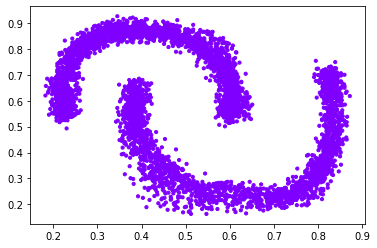

Best clustering with nb_samples = 19 and eps = 2.9000000000000004
--- 77.05291819572449 seconds ---
make dbscan clustering on 2d-3c-no123.arff
0.0%
3.4482758620689653%
6.896551724137931%
10.344827586206897%
13.793103448275861%
17.24137931034483%
20.689655172413794%
24.137931034482758%
27.586206896551722%
31.03448275862069%
34.48275862068966%
37.93103448275862%
41.37931034482759%
44.827586206896555%
48.275862068965516%
51.724137931034484%
55.172413793103445%
58.620689655172406%
62.06896551724138%
65.51724137931035%
68.96551724137932%
72.41379310344827%
75.86206896551724%
79.3103448275862%
82.75862068965517%
86.20689655172413%
89.65517241379311%
93.10344827586206%
96.55172413793103%


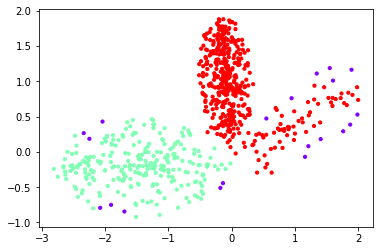

Best clustering with nb_samples = 5 and eps = 0.2
--- 2.7359094619750977 seconds ---
make dbscan clustering on D31.arff
0.0%
3.4482758620689653%
6.896551724137931%
10.344827586206897%
13.793103448275861%
17.24137931034483%
20.689655172413794%
24.137931034482758%
27.586206896551722%
31.03448275862069%
34.48275862068966%
37.93103448275862%
41.37931034482759%
44.827586206896555%
48.275862068965516%
51.724137931034484%
55.172413793103445%
58.620689655172406%
62.06896551724138%
65.51724137931035%
68.96551724137932%
72.41379310344827%
75.86206896551724%
79.3103448275862%
82.75862068965517%
86.20689655172413%
89.65517241379311%
93.10344827586206%
96.55172413793103%


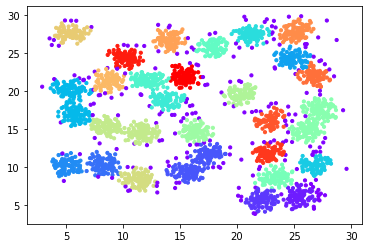

Best clustering with nb_samples = 15 and eps = 0.7000000000000001
--- 29.306588649749756 seconds ---
make dbscan clustering on dartboard1.arff
0.0%
3.4482758620689653%
6.896551724137931%
10.344827586206897%
13.793103448275861%
17.24137931034483%
20.689655172413794%
24.137931034482758%
27.586206896551722%
31.03448275862069%
34.48275862068966%
37.93103448275862%
41.37931034482759%
44.827586206896555%
48.275862068965516%
51.724137931034484%
55.172413793103445%
58.620689655172406%
62.06896551724138%
65.51724137931035%
68.96551724137932%
72.41379310344827%
75.86206896551724%
79.3103448275862%
82.75862068965517%
86.20689655172413%
89.65517241379311%
93.10344827586206%
96.55172413793103%


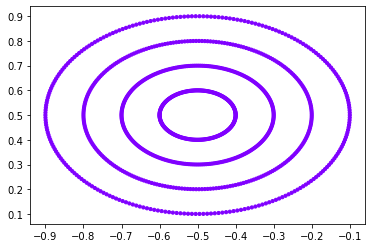

Best clustering with nb_samples = 19 and eps = 2.9000000000000004
--- 3.1843976974487305 seconds ---
make dbscan clustering on 2sp2glob.arff
0.0%
3.4482758620689653%
6.896551724137931%
10.344827586206897%
13.793103448275861%
17.24137931034483%
20.689655172413794%
24.137931034482758%
27.586206896551722%
31.03448275862069%
34.48275862068966%
37.93103448275862%
41.37931034482759%
44.827586206896555%
48.275862068965516%
51.724137931034484%
55.172413793103445%
58.620689655172406%
62.06896551724138%
65.51724137931035%
68.96551724137932%
72.41379310344827%
75.86206896551724%
79.3103448275862%
82.75862068965517%
86.20689655172413%
89.65517241379311%
93.10344827586206%
96.55172413793103%


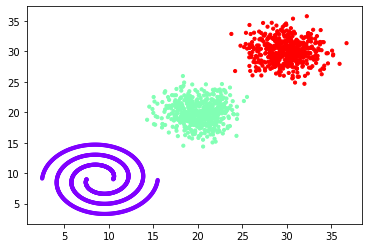

Best clustering with nb_samples = 1 and eps = 2.1
--- 23.69322919845581 seconds ---


In [55]:
tab_eps = np.arange(0.1,3,0.1)
tab_nb_samples = np.arange(1,20,2)



name_file = "banana.arff" 
make_dbscan(name_file,tab_eps,tab_nb_samples) 
name_file = "2d-3c-no123.arff"
make_dbscan(name_file,tab_eps,tab_nb_samples)  
name_file = "D31.arff"
make_dbscan(name_file,tab_eps,tab_nb_samples) 
name_file = "dartboard1.arff"
make_dbscan(name_file,tab_eps,tab_nb_samples) 

name_file = "2sp2glob.arff"
make_dbscan(name_file,tab_eps,tab_nb_samples) 

In [28]:
def make_test_hdbscan(name_file,nb_clusters_size):
    xs,ys = extract_data(name_file)
    X = prepare_dataset(xs,ys)
    
    clusterer = hdbscan.HDBSCAN(min_cluster_size=nb_clusters_size)
    cluster_labels = clusterer.fit_predict(X)
    showClusters(X,cluster_labels)


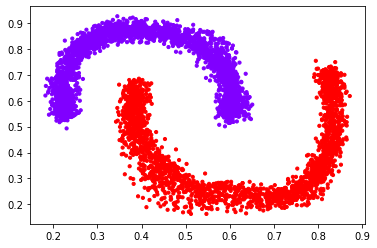

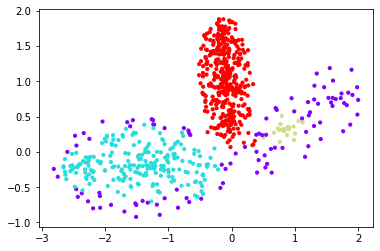

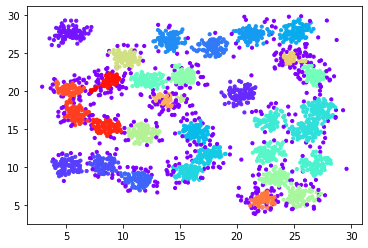

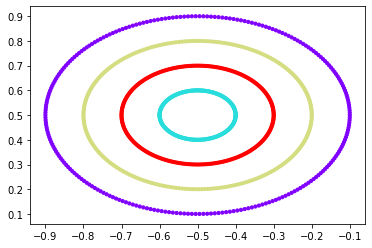

In [29]:
name_file = "banana.arff" 
make_test_hdbscan(name_file,nb_clusters_size=50) 
name_file = "2d-3c-no123.arff"
make_test_hdbscan(name_file,nb_clusters_size=10)  
name_file = "D31.arff"
make_test_hdbscan(name_file,nb_clusters_size=5) 
name_file = "dartboard1.arff"
make_test_hdbscan(name_file,nb_clusters_size=8)

In [69]:
import math

def find_parameters_hdbscan(X,tab_min_cluster_size:np.array(int)):
    """
    Loop into tab_min_cluster_size to find best values using silhouette to find
    """
    best_score = -float('inf')
    index_best_min_cluster_size = -1
    
    for i,min_cluster_size in enumerate(tab_min_cluster_size):
        print(f'{(i/(np.size(tab_min_cluster_size)))*100}%')
        clustering = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size).fit(X)
        if(len(set(clustering.labels_))>2):
            new_X,new_labels = filter_list(X,clustering.labels_)
            score_silhouette =  metrics.silhouette_score(new_X,new_labels)
            if(best_score<score_silhouette):
                best_score = score_silhouette
                index_best_min_cluster_size = i
    return tab_min_cluster_size[index_best_min_cluster_size]

def make_hdbscan(name_file:str,tab_min_cluster_size):

    print(f'make hdbcan clustering on {name_file}')
    start_time = time.time()
    
    xs,ys = extract_data(name_file)
    X = prepare_dataset(xs,ys)
    
    best_min_cluster_size = find_parameters_hdbscan(X,tab_min_cluster_size)
    
    labels = make_test_hdbscan(name_file,best_min_cluster_size)
    print(f'Best clustering with min_cluster_size = {best_min_cluster_size} ')
    
        
    print("--- %s seconds ---" % (time.time() - start_time))

make hdbcan clustering on banana.arff
0.0%
2.083333333333333%
4.166666666666666%
6.25%
8.333333333333332%
10.416666666666668%
12.5%
14.583333333333334%
16.666666666666664%
18.75%
20.833333333333336%
22.916666666666664%
25.0%
27.083333333333332%
29.166666666666668%
31.25%
33.33333333333333%
35.41666666666667%
37.5%
39.58333333333333%
41.66666666666667%
43.75%
45.83333333333333%
47.91666666666667%
50.0%
52.083333333333336%
54.166666666666664%
56.25%
58.333333333333336%
60.416666666666664%
62.5%
64.58333333333334%
66.66666666666666%
68.75%
70.83333333333334%
72.91666666666666%
75.0%
77.08333333333334%
79.16666666666666%
81.25%
83.33333333333334%
85.41666666666666%
87.5%
89.58333333333334%
91.66666666666666%
93.75%
95.83333333333334%
97.91666666666666%


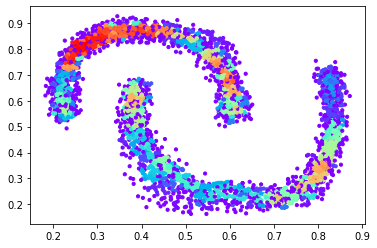

Best clustering with min_cluster_size = 2 
--- 5.212562799453735 seconds ---
make hdbcan clustering on 2d-3c-no123.arff
0.0%
2.083333333333333%
4.166666666666666%
6.25%
8.333333333333332%
10.416666666666668%
12.5%
14.583333333333334%
16.666666666666664%
18.75%
20.833333333333336%
22.916666666666664%
25.0%
27.083333333333332%
29.166666666666668%
31.25%
33.33333333333333%
35.41666666666667%
37.5%
39.58333333333333%
41.66666666666667%
43.75%
45.83333333333333%
47.91666666666667%
50.0%
52.083333333333336%
54.166666666666664%
56.25%
58.333333333333336%
60.416666666666664%
62.5%
64.58333333333334%
66.66666666666666%
68.75%
70.83333333333334%
72.91666666666666%
75.0%
77.08333333333334%
79.16666666666666%
81.25%
83.33333333333334%
85.41666666666666%
87.5%
89.58333333333334%
91.66666666666666%
93.75%
95.83333333333334%
97.91666666666666%


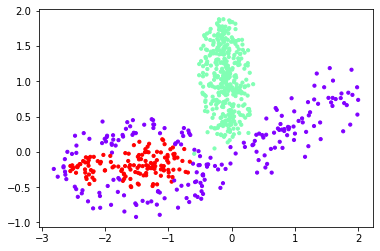

Best clustering with min_cluster_size = 35 
--- 0.8601574897766113 seconds ---
make hdbcan clustering on D31.arff
0.0%
2.083333333333333%
4.166666666666666%
6.25%
8.333333333333332%
10.416666666666668%
12.5%
14.583333333333334%
16.666666666666664%
18.75%
20.833333333333336%
22.916666666666664%
25.0%
27.083333333333332%
29.166666666666668%
31.25%
33.33333333333333%
35.41666666666667%
37.5%
39.58333333333333%
41.66666666666667%
43.75%
45.83333333333333%
47.91666666666667%
50.0%
52.083333333333336%
54.166666666666664%
56.25%
58.333333333333336%
60.416666666666664%
62.5%
64.58333333333334%
66.66666666666666%
68.75%
70.83333333333334%
72.91666666666666%
75.0%
77.08333333333334%
79.16666666666666%
81.25%
83.33333333333334%
85.41666666666666%
87.5%
89.58333333333334%
91.66666666666666%
93.75%
95.83333333333334%
97.91666666666666%


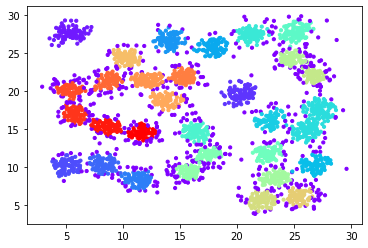

Best clustering with min_cluster_size = 11 
--- 5.427239656448364 seconds ---
make hdbcan clustering on dartboard1.arff
0.0%
2.083333333333333%
4.166666666666666%
6.25%
8.333333333333332%
10.416666666666668%
12.5%
14.583333333333334%
16.666666666666664%
18.75%
20.833333333333336%
22.916666666666664%
25.0%
27.083333333333332%
29.166666666666668%
31.25%
33.33333333333333%
35.41666666666667%
37.5%
39.58333333333333%
41.66666666666667%
43.75%
45.83333333333333%
47.91666666666667%
50.0%
52.083333333333336%
54.166666666666664%
56.25%
58.333333333333336%
60.416666666666664%
62.5%
64.58333333333334%
66.66666666666666%
68.75%
70.83333333333334%
72.91666666666666%
75.0%
77.08333333333334%
79.16666666666666%
81.25%
83.33333333333334%
85.41666666666666%
87.5%
89.58333333333334%
91.66666666666666%
93.75%
95.83333333333334%
97.91666666666666%


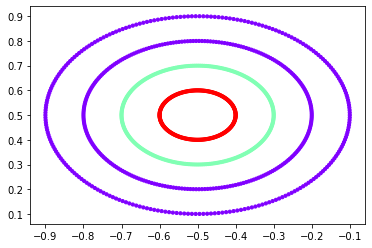

Best clustering with min_cluster_size = 28 
--- 1.0518755912780762 seconds ---
make dbscan clustering on 2sp2glob.arff
0.0%
3.4482758620689653%
6.896551724137931%
10.344827586206897%
13.793103448275861%
17.24137931034483%
20.689655172413794%
24.137931034482758%
27.586206896551722%
31.03448275862069%
34.48275862068966%
37.93103448275862%
41.37931034482759%
44.827586206896555%
48.275862068965516%
51.724137931034484%
55.172413793103445%
58.620689655172406%
62.06896551724138%
65.51724137931035%
68.96551724137932%
72.41379310344827%
75.86206896551724%
79.3103448275862%
82.75862068965517%
86.20689655172413%
89.65517241379311%
93.10344827586206%
96.55172413793103%


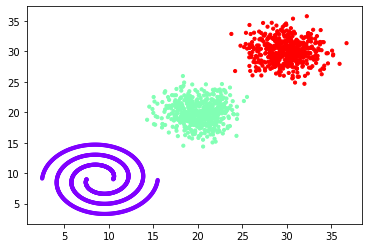

Best clustering with nb_samples = 1 and eps = 2.1
--- 23.187026262283325 seconds ---


In [71]:
tab_min_cluster_size = np.arange(2,50)
tab_min_cluster_size = [int(elem) for elem in tab_min_cluster_size]
name_file = "banana.arff" 
make_hdbscan(name_file,tab_min_cluster_size) 
name_file = "2d-3c-no123.arff"
make_hdbscan(name_file,tab_min_cluster_size)  
name_file = "D31.arff"
make_hdbscan(name_file,tab_min_cluster_size)  
name_file = "dartboard1.arff"
make_hdbscan(name_file,tab_min_cluster_size)  
name_file = "2sp2glob.arff"
make_dbscan(name_file,tab_eps,tab_nb_samples) 